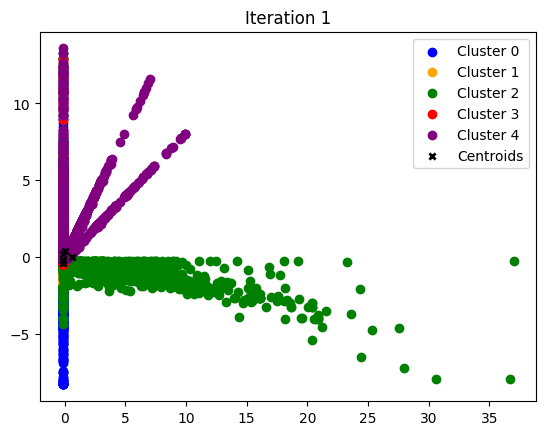

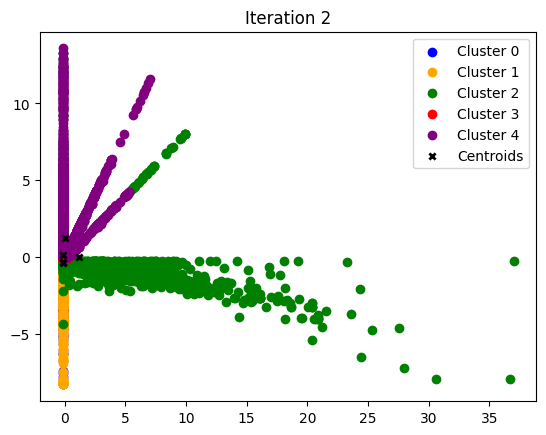

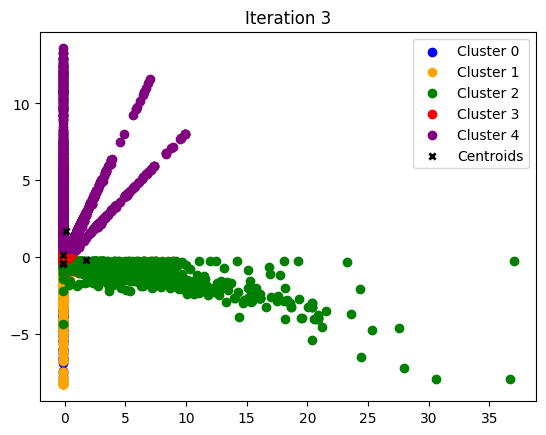

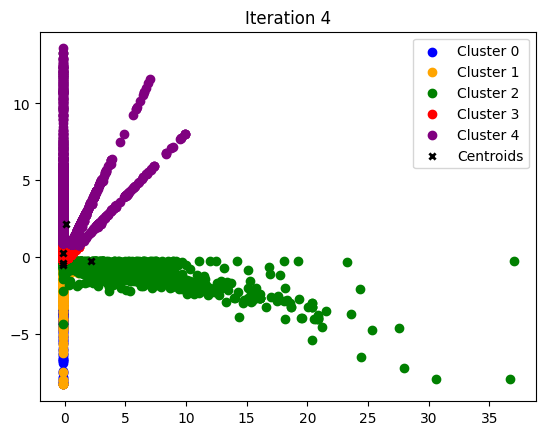

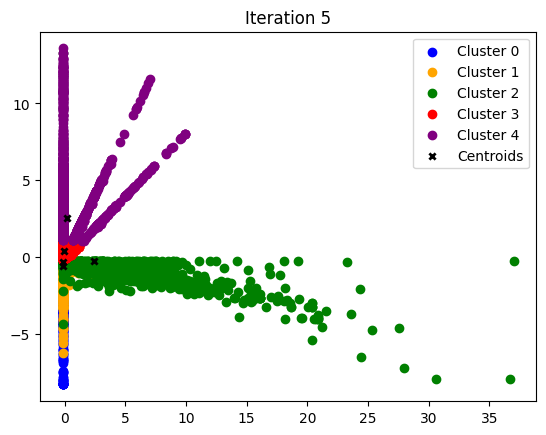

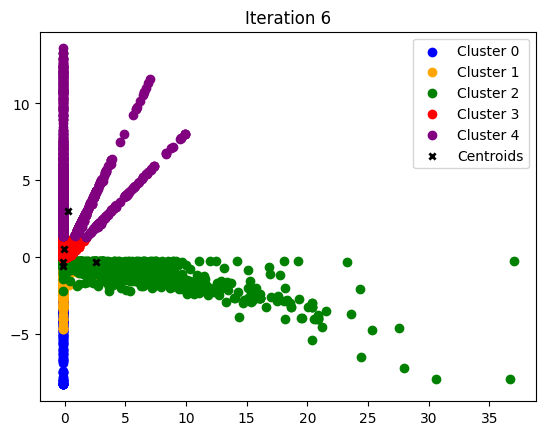

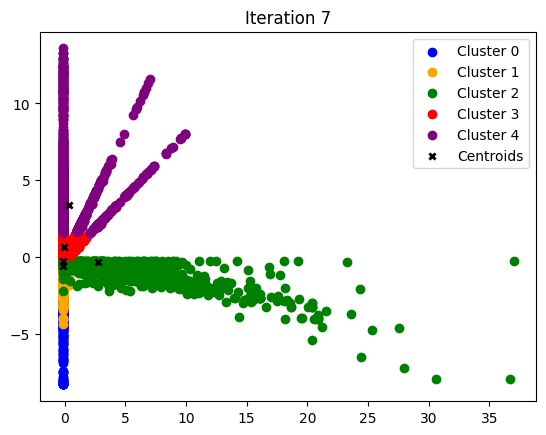

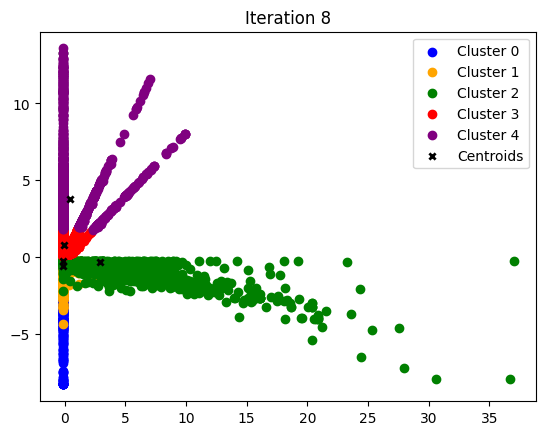

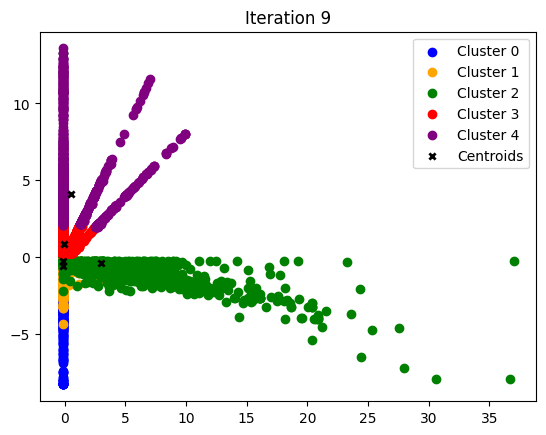

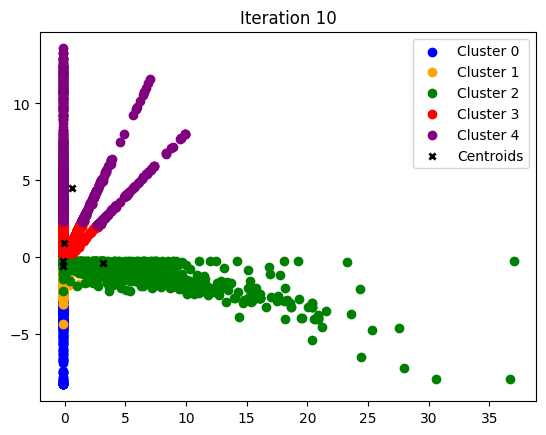

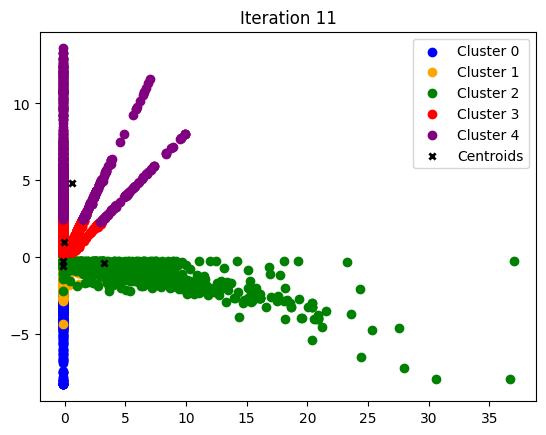

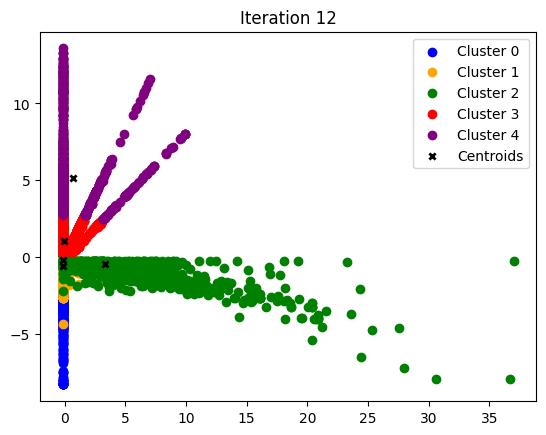

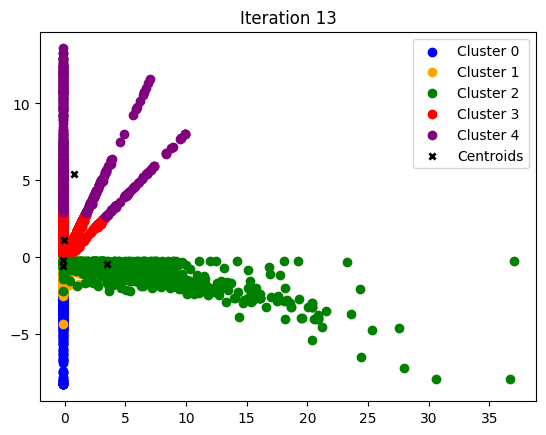

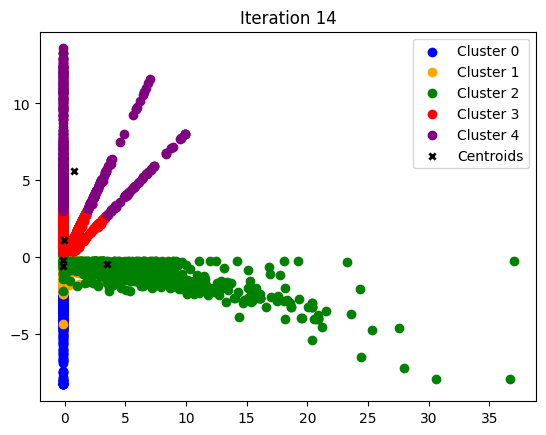

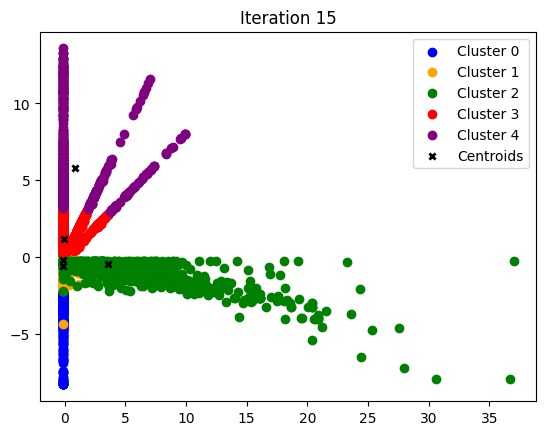

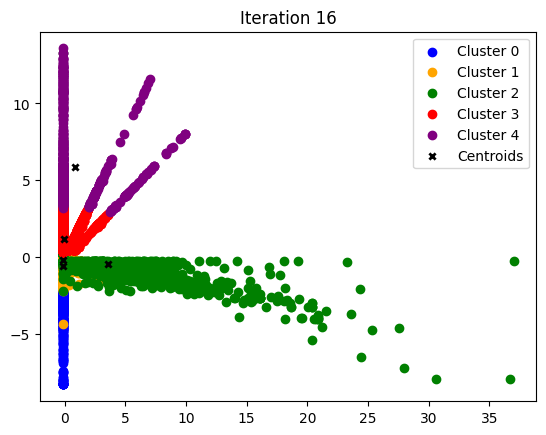

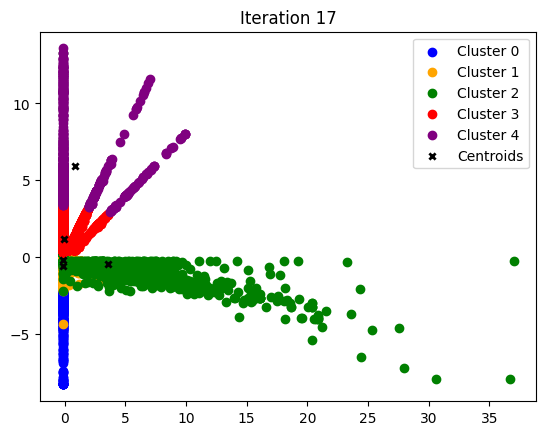

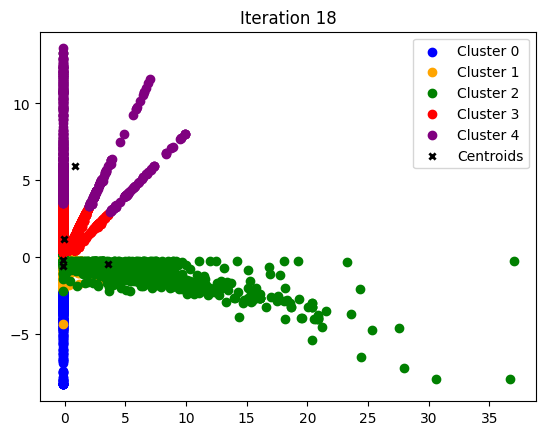

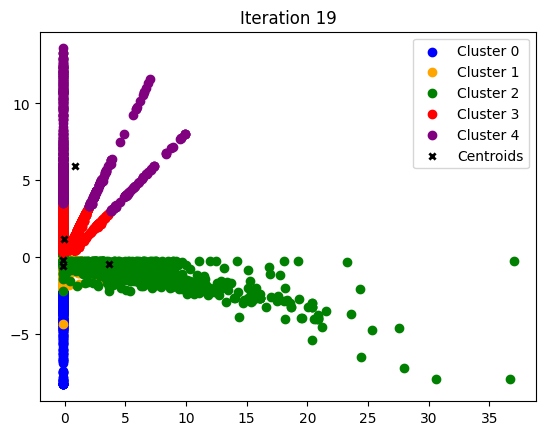

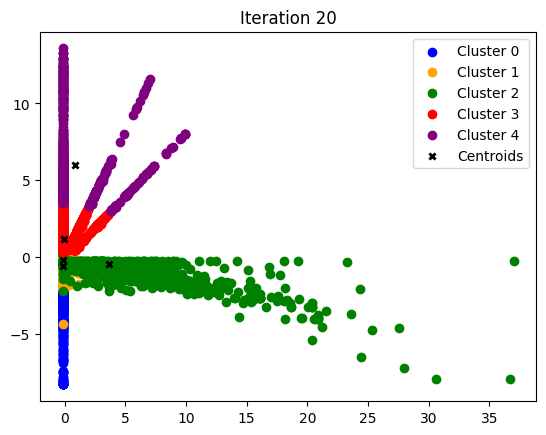

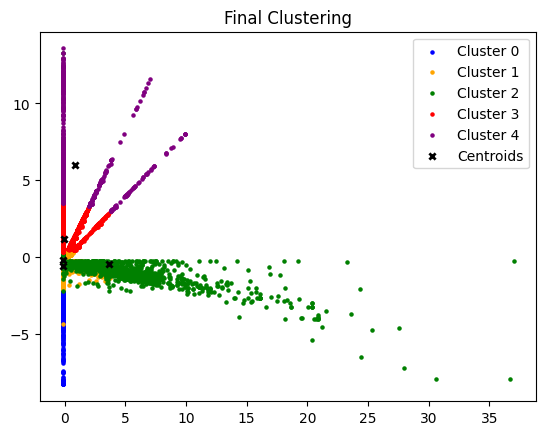

In [19]:
# Define KMeans class
class KMeans:
    def __init__(self, k=2, max_iter=100):
        self.k = k
        self.max_iter = max_iter
    
    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]
        
        # Iterate until convergence or max_iter reached
        for i in range(self.max_iter):
            # Assign data points to nearest centroid
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            labels = np.argmin(distances, axis=0)
            
            # Update centroids to mean of assigned data points
            for j in range(self.k):
                self.centroids[j] = X[labels==j].mean(axis=0)
            
            # Visualize clusters
            plt.figure()
            colors = ['blue', 'orange', 'green', 'red', 'purple']
            for j in range(self.k):
                plt.scatter(X[labels==j][:, 0], X[labels==j][:, 1], color=colors[j], label=f"Cluster {j}")
            plt.scatter(self.centroids[:, 0], self.centroids[:, 1], marker='x', s=20, linewidths=2, color='black', label='Centroids')
            plt.title(f"Iteration {i+1}")
            plt.legend()
            plt.show()
            
        # Move legend outside of loop and set labels for data points and centroids
        plt.figure()
        for j in range(self.k):
            plt.scatter(X[labels==j][:, 0], X[labels==j][:, 1], color=colors[j], label=f"Cluster {j}", s=5)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], marker='x', s=20, linewidths=2, color='black', label='Centroids')
        plt.title(f"Final Clustering")
        plt.legend()
        plt.show()

        # Get final cluster assignments for each data point
        final_labels = np.argmin(np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2)), axis=0)
        
        # Label clusters from 1 to 5
        final_labels += 1
        
        return final_labels

# Load data from DataFrame and extract relevant columns
data = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/transactions_df_clean.csv')
X = data[['interest_amt', 'new_balance', 'principal_amt', 'tran_amt']].values

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create KMeans object and fit data
kmeans = KMeans(k=5, max_iter=20)
labels = kmeans.fit(X_scaled)


In [24]:
# Assign transactions to their respective clusters
data['cluster'] = labels

# Create a DataFrame for each cluster and populate it with transactions
for cluster_num in range(kmeans.k):
    cluster_data = data[data['cluster'] == cluster_num]
    cluster_data.to_csv(f'cluster_{cluster_num}.csv', index=False)

data.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code,cluster
0,27,13625623,0.00,0.00,0.0,3753.34,1995-10-21,12:16:56,A,IQ,4
1,97,13628392,0.00,0.00,0.0,254.49,1995-02-05,15:30:53,V,IQ,2
2,21,13630842,-97.57,-97.57,0.0,3819.56,1995-07-23,NaN,P,WD,4
3,44,13631412,-0.15,-0.15,0.0,224.05,1995-01-30,NaN,,FK,2
4,31,13625722,0.00,0.00,0.0,240.55,1995-01-25,20:45:21,B,IQ,2
